#### Problem Statement
problem is to estimate the relative CPU performance of computer hardware dataset. Relative CPU performance of the computer hardware is described in terms of machine cycle time, main memory, cache memory and minimum and maximum channels as given in the dataset.



In [2]:
# import required Python libraries

# to handle datasets
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('machine.data',header = None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [5]:
df.shape

(208, 10)

In [8]:
# rename columns of dataframe df

col_names = ['Vendor Name','Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH','CHMIN', 'CHMAX', 'PRP', 'ERP' ]

df.columns = col_names

In [9]:
df.head()

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [10]:
# view dataframe summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor Name  209 non-null    object
 1   Model Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


##### INSIGHTS: 
We can see that there are categorical and numerical variables in the dataset. Numerical variables have data types int64 and categorical variables are those of type object.

In [12]:
# find categorical variables

categorical = [col for col in df.columns if df[col].dtype=='O']
len(categorical)

2

In [13]:
categorical

['Vendor Name', 'Model Name']

In [14]:
# view the top five rows of categorical variables

df[categorical].head()


,Vendor Name,Model Name
0,adviser,32/60
1,amdahl,470v/7
2,amdahl,470v/7a
3,amdahl,470v/7b
4,amdahl,470v/7c


In [17]:
df['Vendor Name'].unique()


array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [18]:
df['Vendor Name'].nunique()


30

In [15]:
# exploring the categories in Vendor Name column

df['Vendor Name'].value_counts()

Vendor Name
ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
cdc              9
amdahl           9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
ipl              6
magnuson         6
cambex           5
prime            5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
bti              2
basf             2
apollo           2
microdata        1
four-phase       1
sratus           1
adviser          1
Name: count, dtype: int64

##### INSIGHTS:
ibm is the most frequent category in the Vendor Name column.



In [19]:
df['Model Name'].nunique()

209

In [21]:
len(df)

209

##### INSIGHTS
We can see that Model Name is a unique identifier for each of the computer models. Thus this is not a variable that we can use to predict the estimated relative performance of computer models. So, we should not use this column for model building.

In [22]:
# find numerical variables

numerical = [col for col in df.columns if df[col].dtype!='O']

In [23]:
len(numerical)

8

In [24]:
numerical

['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

In [25]:
# view the top 5 rows of numerical variables

df[numerical].head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


vendor name: 
Model Name: many unique symbols

MYCT: machine cycle time in nanoseconds (integer)

MMIN: minimum main memory in kilobytes (integer)

MMAX: maximum main memory in kilobytes (integer)

CACH: cache memory in kilobytes (integer)

CHMIN: minimum channels in units (integer)

CHMAX: maximum channels in units (integer)

PRP: published relative performance (integer)

ERP: estimated relative performance from the original article (integer)

##### INSIGHTS:
We can see that we have eight numerical variables in the dataset. All the eight numerical variables are of discrete type.

On closer inspection, we find that PRP is a redundant column in the dataframe. It denotes published relative performance. Our target is to predict estimated relative performance. So, we should delete PRP from the dataframe


Summary : types of variables

* There are 2 categorical variables and 8 numerical variables.

* The 2 categorical variables, Vendor Name and Model Name are 2 non-predictive attributes as given in the dataset description. So, I do not use them for model building.

* All of the 8 numerical variables are of discrete type.

* Out of the 8 numerical variables, PRP is the linear regression's guess. It is redundant column. I do not use it for model building.

* ERP (estimated relative performance is the goal field). It is the target variable.

##### Estimate correlation coefficients
Our dataset is very small. So, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes.

We can compute it using the df.corr() method as follows:-

In [31]:
# estimate correlation coefficients of numerical columns
corr_matrix = df.select_dtypes(include=['number']).corr()
corr_matrix


,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.0000,-0.3356,-0.3786,-0.3210,-0.3011,-0.2505,-0.3071,-0.2884
MMIN,-0.3356,1.0000,0.7582,0.5347,0.5172,0.2669,0.7949,0.8193
MMAX,-0.3786,0.7582,1.0000,0.5380,0.5605,0.5272,0.8630,0.9012
CACH,-0.3210,0.5347,0.5380,1.0000,0.5822,0.4878,0.6626,0.6486
CHMIN,-0.3011,0.5172,0.5605,0.5822,1.0000,0.5483,0.6089,0.6106
CHMAX,-0.2505,0.2669,0.5272,0.4878,0.5483,1.0000,0.6052,0.5922
PRP,-0.3071,0.7949,0.8630,0.6626,0.6089,0.6052,1.0000,0.9665
ERP,-0.2884,0.8193,0.9012,0.6486,0.6106,0.5922,0.9665,1.0000


In [32]:
corr_matrix['ERP'].sort_values(ascending=False)


ERP      1.0000
PRP      0.9665
MMAX     0.9012
MMIN     0.8193
CACH     0.6486
CHMIN    0.6106
CHMAX    0.5922
MYCT    -0.2884
Name: ERP, dtype: float64

##### INSIGHTS
The correlation coefficient ranges from -1 to +1.

When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between ERP and MMAX.

When it is clsoe to -1, it means that there is a strong negative correlation. So, there is a small negative correlation between ERP and MYCT.

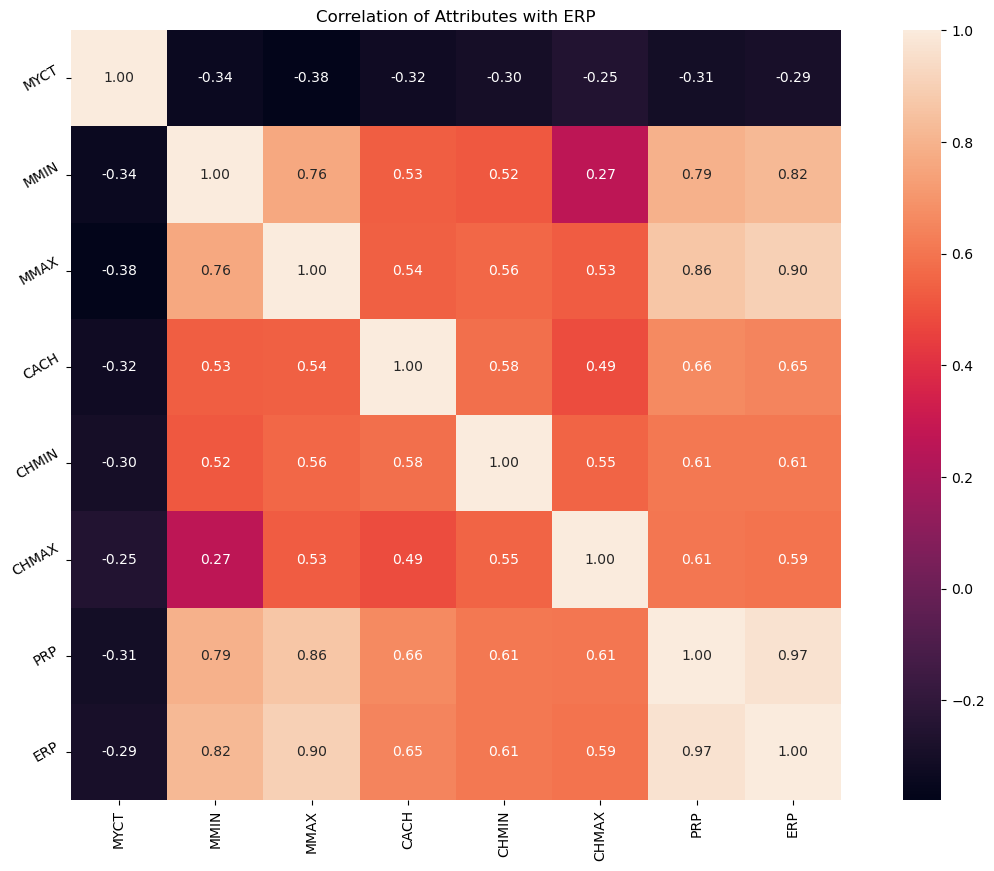

In [33]:
# CORRELATION HEATMAP
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with ERP')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

##### INSIGHTS
We can see that ERP is positively correlated with MMIN, MMAX, CACH, CHMIN and CHMAX.

Also, there is a strong positive correlation between ERP and MMIN and also between ERP and MMAX.

In [34]:
# let's visualise the number of missing values
df.isnull().sum()

Vendor Name    0
Model Name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

##### INSIGHTS:
No missing values in dataset

In [35]:
# let's view the summary statistics of the dataset
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000
mean,203.8230,"2,867.9809","11,796.1531",25.2057,4.6986,18.2679,105.6220,99.3301
std,260.2629,"3,878.7428","11,726.5644",40.6287,6.8163,25.9973,160.8307,154.7571
min,17.0000,64.0000,64.0000,0.0000,0.0000,0.0000,6.0000,15.0000
25%,50.0000,768.0000,"4,000.0000",0.0000,1.0000,5.0000,27.0000,28.0000
50%,110.0000,"2,000.0000","8,000.0000",8.0000,2.0000,8.0000,50.0000,45.0000
75%,225.0000,"4,000.0000","16,000.0000",32.0000,6.0000,24.0000,113.0000,101.0000
max,"1,500.0000","32,000.0000","64,000.0000",256.0000,52.0000,176.0000,"1,150.0000","1,238.0000"


In [36]:
# outliers in discrete variables

for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    print(df[var].value_counts() / float(len(df)))
    print()


MYCT
50     0.1196
140    0.0431
26     0.0383
300    0.0383
56     0.0335
320    0.0335
38     0.0335
180    0.0335
200    0.0287
75     0.0287
105    0.0287
800    0.0287
143    0.0239
160    0.0239
900    0.0239
110    0.0191
25     0.0191
29     0.0191
23     0.0191
60     0.0191
400    0.0191
115    0.0144
100    0.0144
225    0.0144
250    0.0144
92     0.0144
30     0.0144
125    0.0144
480    0.0144
330    0.0144
57     0.0096
1500   0.0096
59     0.0096
240    0.0096
133    0.0096
72     0.0096
810    0.0096
700    0.0096
40     0.0096
17     0.0096
1100   0.0096
84     0.0048
124    0.0048
116    0.0048
203    0.0048
70     0.0048
52     0.0048
175    0.0048
350    0.0048
167    0.0048
112    0.0048
185    0.0048
64     0.0048
48     0.0048
35     0.0048
600    0.0048
90     0.0048
220    0.0048
150    0.0048
98     0.0048
Name: count, dtype: float64

MMIN
2000    0.2584
1000    0.1818
512     0.1053
4000    0.1053
8000    0.0957
256     0.0622
768     0.0478
16000   0.0335
3

##### INSIGHTS:

Analyzing Each Feature

A. MYCT (Machine Cycle Time)
Most frequent values: 50 (11.96%), 140 (4.31%), 26 (3.83%), 300 (3.83%).
Outliers: Values appearing <1% (e.g., 1500, 1100, 700, 40, 17).

B. MMIN (Minimum Memory)
Most frequent values: 2000 (25.84%), 1000 (18.18%), 512 (10.53%).
Outliers: Values appearing ≤0.5% (e.g., 96, 192, 32000, 64).

C. MMAX (Maximum Memory)
Most frequent values: 8000 (20.57%), 16000 (16.75%), 4000 (15.79%).
Outliers: Values appearing ≤0.5% (e.g., 768, 3500, 1500, 64).

D. CACH (Cache Memory)
Most frequent values: 0 (33.01%), 8 (14.83%), 32 (11.00%).
Outliers: Values appearing ≤0.5% (e.g., 142, 12, 160, 96).

E. CHMIN (Minimum Channels)
Most frequent values: 1 (44.98%), 3 (13.40%), 8 (8.61%).
Outliers: Values appearing ≤0.5% (e.g., 32, 7, 24, 26).

F. CHMAX (Maximum Channels)
Most frequent values: 6 (14.35%), 24 (11.48%), 8 (9.57%).
Outliers: Values appearing ≤0.5% (e.g., 176, 112, 31, 48, 15).

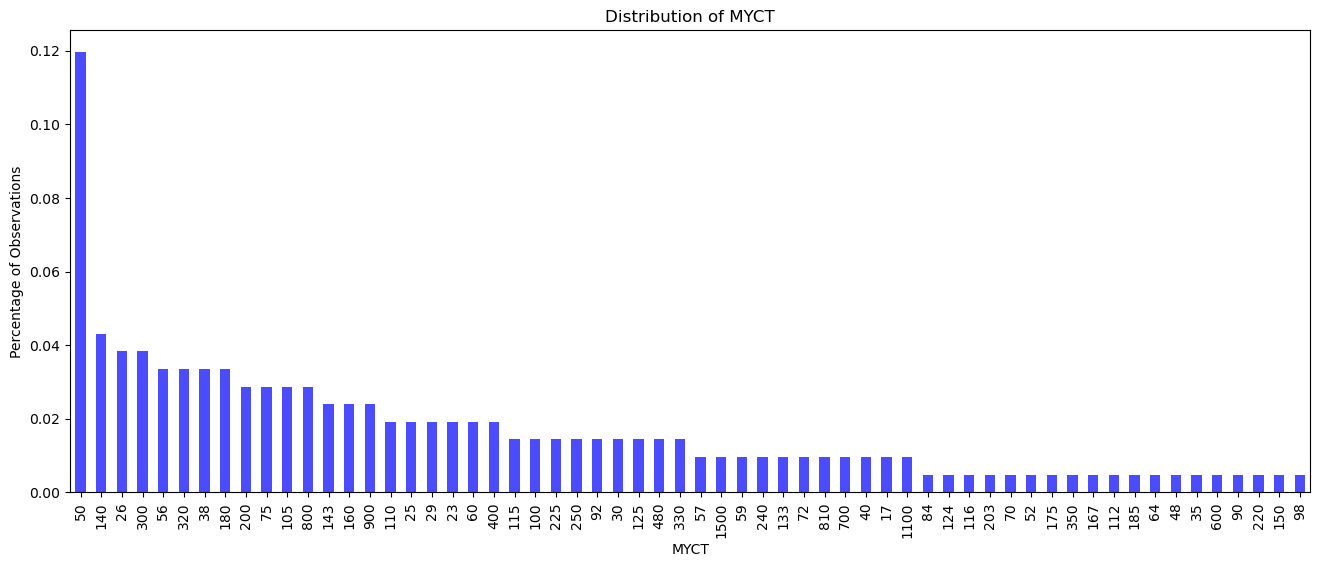

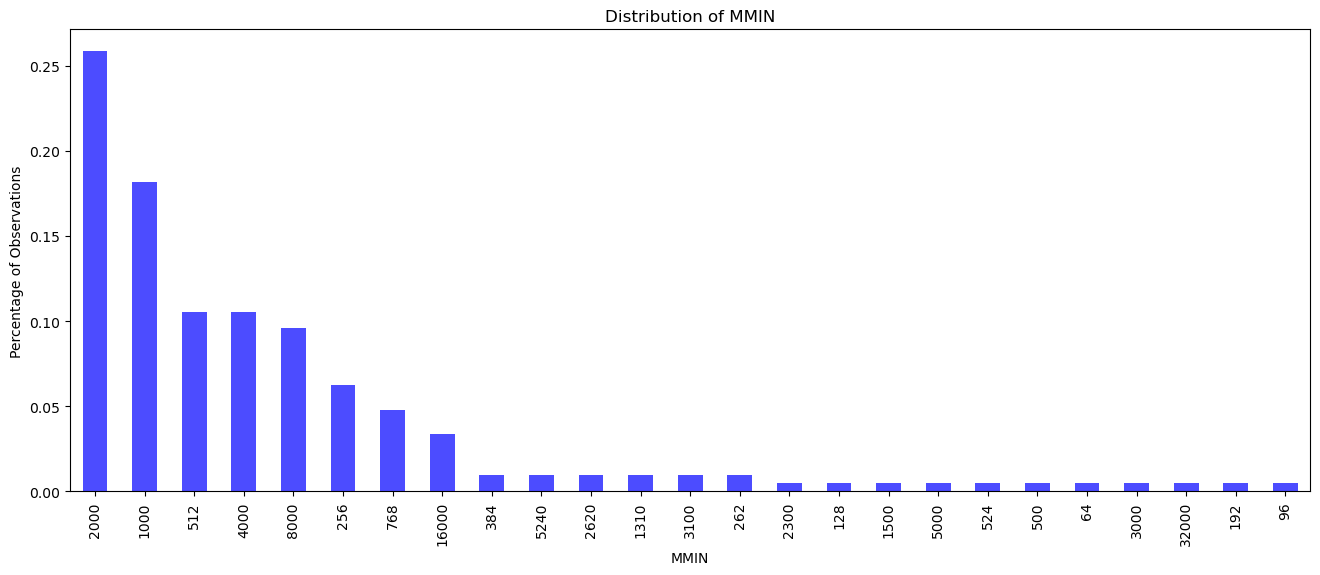

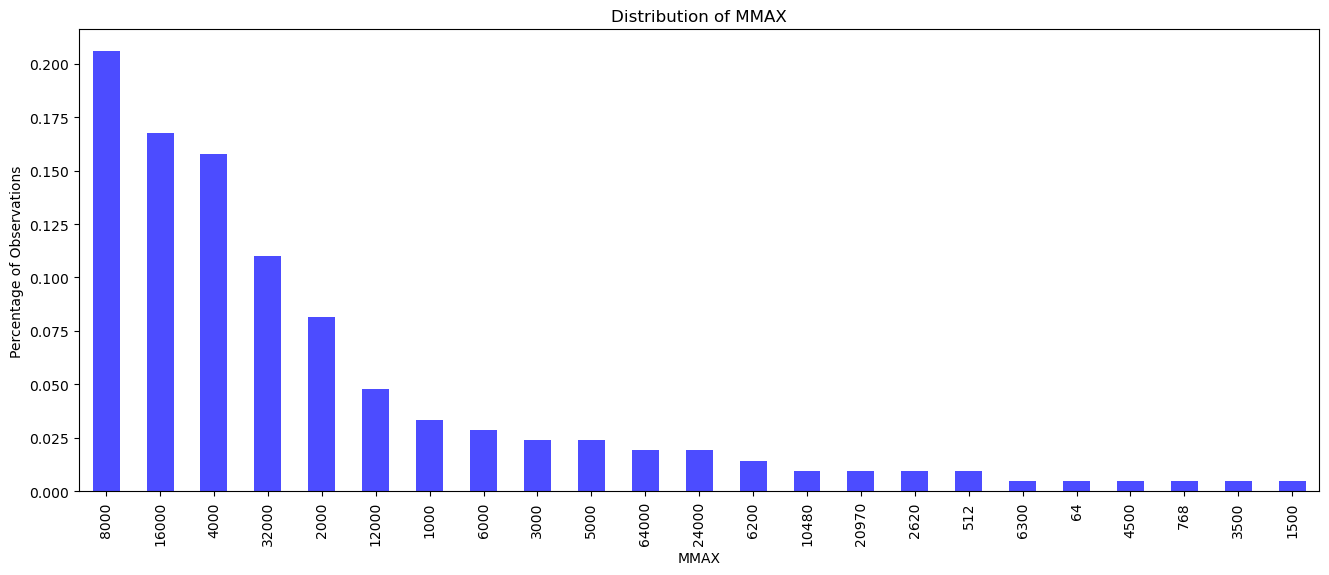

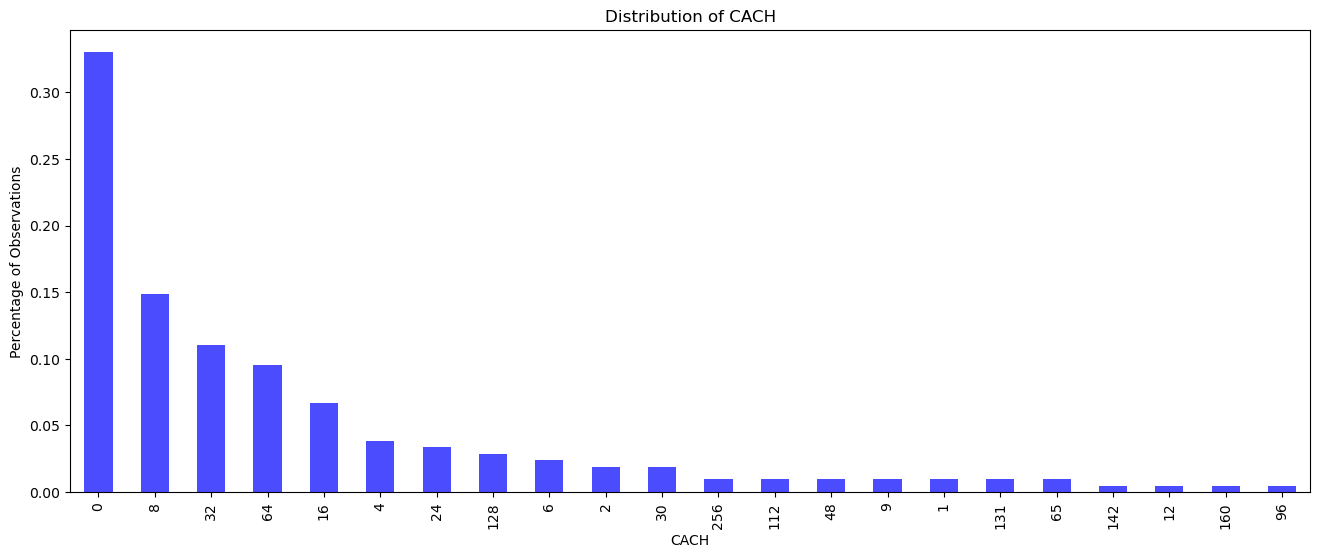

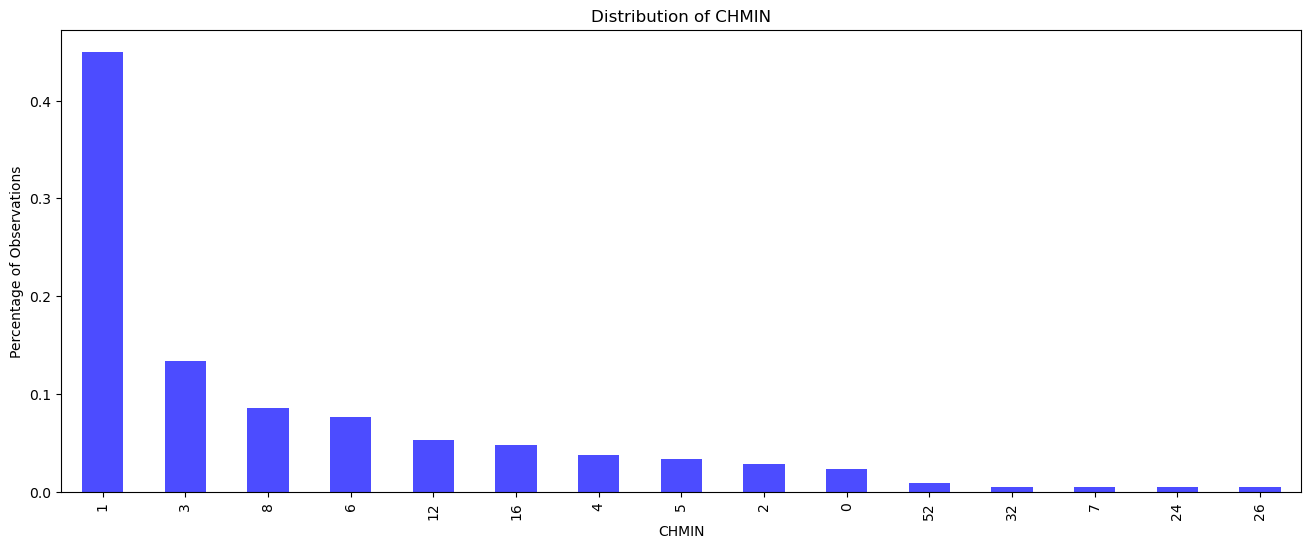

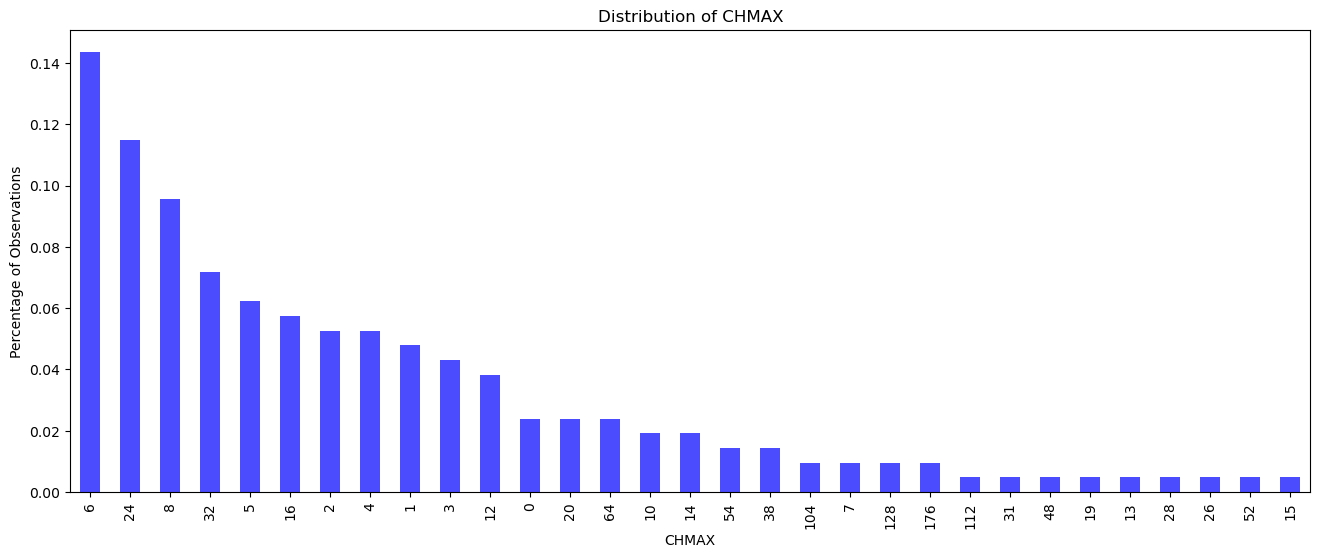

In [37]:
# Detecting rare categories in discrete variables Visually
for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    plt.figure(figsize=(16, 6))
    
    # Normalize by total count
    df[var].value_counts(normalize=True).plot(kind='bar', color='blue', alpha=0.7)
    
    plt.xlabel(var)
    plt.ylabel('Percentage of Observations')
    plt.title(f'Distribution of {var}')
    plt.show()

##### INSIGHTS:

From the above plot, we can see that the discrete variables show values that are shared by a tiny proportion of variable values in the dataset. For linear regression modeling, this does not cause any problem.

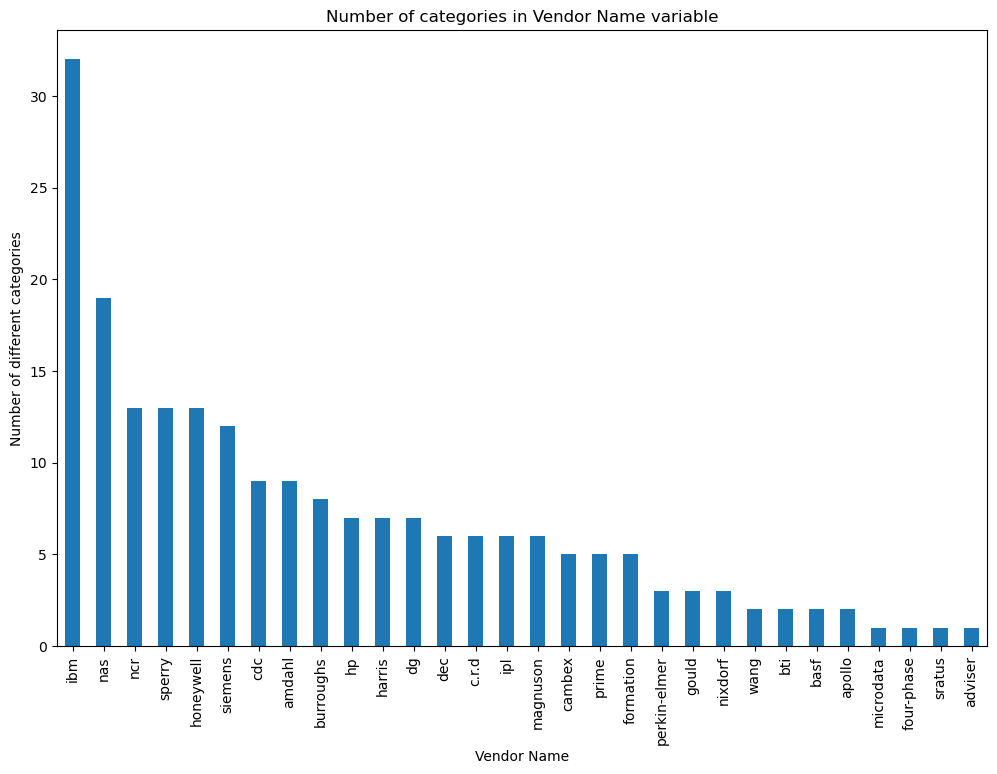

In [41]:
# plot the categorical variable

plt.figure(figsize=(12,8))
(df['Vendor Name'].value_counts()).plot.bar()
plt.title('Number of categories in Vendor Name variable')
plt.xlabel('Vendor Name')
plt.ylabel('Number of different categories')
plt.show()

##### INSIGHTS
The Vendor Name variable has only a few unique labels, meaning high cardinality is not an issue. This makes encoding easier, prevents overfitting, and eliminates the need for feature reduction. Encoding methods like one-hot or label encoding can be applied without complications. 🚀

## LINEAR REGRESSION MODELLING

In [42]:
# divide the data set into numerical and categorical
df_cat = df.iloc[:,:2]

df_num = df.iloc[:, 2:]


In [43]:
df_num.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


In [44]:
X = df_num.iloc[:,0:6]

y = df_num.iloc[:,-1]

In [46]:
X

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125,256,6000,256,16,128
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,32000,32,8,32
4,29,8000,16000,32,8,16
...,...,...,...,...,...,...
204,124,1000,8000,0,1,8
205,98,1000,8000,32,2,8
206,125,2000,8000,0,2,14
207,480,512,8000,32,0,0


In [47]:
y

0      199
1      253
2      253
3      253
4      132
      ... 
204     37
205     50
206     41
207     47
208     25
Name: ERP, Length: 209, dtype: int64

In [48]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [49]:
X_train.shape, y_train.shape

((146, 6), (146,))

In [50]:
X_test.shape, y_test.shape


((63, 6), (63,))

In [51]:
# let's inspect the training dataframe

X_train.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
61,800,256,8000,0,1,4
24,320,128,6000,0,1,12
30,25,1310,2620,131,12,24
60,800,256,8000,0,1,4
56,220,1000,8000,16,1,2


In [52]:
X_train.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,146.0000,146.0000,146.0000,146.0000,146.0000,146.0000
mean,205.8082,"2,799.9726","11,741.2055",25.5685,4.5479,19.2397
std,249.6152,"3,865.5077","11,879.6456",41.6903,6.5770,28.8810
min,17.0000,64.0000,64.0000,0.0000,0.0000,0.0000
25%,50.0000,512.0000,"4,000.0000",0.0000,1.0000,5.0000
50%,115.5000,"2,000.0000","8,000.0000",8.0000,1.5000,8.0000
75%,240.0000,"4,000.0000","16,000.0000",32.0000,6.0000,24.0000
max,"1,500.0000","32,000.0000","64,000.0000",256.0000,52.0000,176.0000


In [53]:
# Feature Scaling - I use the StandardScaler from sklearn

# import the StandardScaler class from preprocessing library
from sklearn.preprocessing import StandardScaler

# instantiate an object scaler
scaler = StandardScaler()

# fit the scaler to the training set and then transform it
X_train = scaler.fit_transform(X_train)

# transform the test set
X_test = scaler.transform(X_test)

In [54]:
# fit the linear regression model

# import the LinearRegression class from linear_model library
from sklearn.linear_model import LinearRegression

# instantiate an object lr
lr = LinearRegression()


# Train the model using the training sets
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predict on the test data set
y_pred = lr.predict(X_test)

In [57]:
#print("Predicted ERP - estimated relative performance for the first five values")

lr.predict(X_test)[0:5]

array([ 53.25899879,  -7.30914167,  85.61134478, 333.46353054,
        88.17105392])

In [64]:
y_test.head()

12      70
80      23
33      74
5      290
187     67
Name: ERP, dtype: int64

In [60]:
# model slope and intercept
print("Number of coefficients:", len(lr.coef_))

print("Estimated coefficients: {}".format(lr.coef_))

print("Estimated intercept: {}".format(lr.intercept_))

Number of coefficients: 6
Estimated coefficients: [17.70202595 59.11241774 78.35042681 16.53981449 -0.35410978 38.97256261]
Estimated intercept: 100.0


In [61]:
# RMSE(Root Mean Square Error)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 37.99


##### INSIGHTS:
The RMSE value has been found to be 37.99. It means the standard deviation for our prediction is 37.99. So, sometimes we expect the predictions to be off by more than 37.99 and other times we expect less than 37.99.

In [66]:
# R2 Score

from sklearn.metrics import r2_score
print("R2 Score value: {:.2f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.92


##### INSIGHTS
In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy.

Our R2 score value has been found to be 0.92. It means that this model explains 92% of the variance in our dependent variable. So, the R2 score value confirms that the model is good enough to deploy because it provides good fit to the data.

In [67]:
# Evaluating training set performance

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))

Training set score: 0.91


In [68]:
# Evaluating test set performance

print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Test set score: 0.92


##### INSIGHTS:
Training set and test set performances are comparable. An R Square value of 0.92 is very good.



#### CROSS VALIDATION :
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model.

In cross-validation, we split the training data into several subgroups. Then we use each of them in turn to evaluate the model fitted on the remaining portion of the data.

It helps us to obtain reliable estimates of the model's generalization performance. So, it helps us to understand how well the model performs on unseen data.

In [69]:
# import the library
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lr, X, y, cv=5)

In [70]:
# print the 5-fold cross-validation scores
print(cv_scores.round(4))

[ 0.8484 -0.864   0.7149  0.8755  0.7707]


In [71]:
# print the avarage 5-fold cross-validation scores
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores).round(4)))

Average 5-Fold CV Score: 0.4691


##### INSIGHTS:
There is a large fluctuation in the cross validation scores of the model.

The average 5-fold cross validation score is very poor and hence the linear regression model is not a great fit to the data.

##### Residual plot analysis
The scatter-plot of these residuals( observed value of the dependent variable (y) and the predicted value (ŷi) ) is called residual plot
If the data points in a residual plot are randomly dispersed around horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.

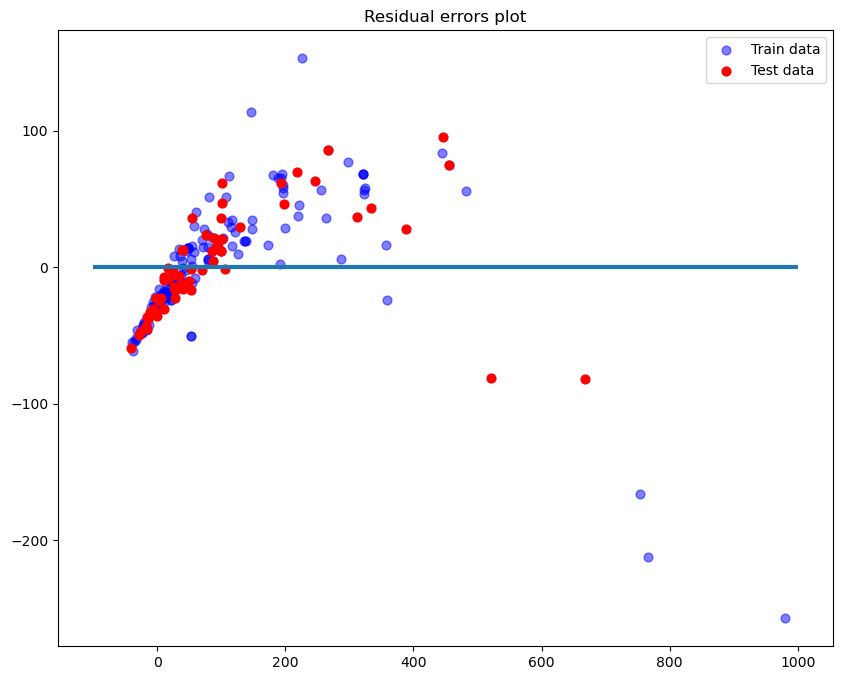

In [72]:
# Plot for residual error

# adjust the figure size
plt.figure(figsize=(10,8))

# plotting residual errors in training data
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c = 'b', s = 40, label = 'Train data', alpha = 0.5)

# plotting residual errors in test data
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c = 'r', s = 40, label = 'Test data')

# plotting line for zero residual error
plt.hlines(y = 0, xmin = -100, xmax = 1000, linewidth = 3)

# plotting legend
plt.legend(loc = 'upper right')

# plot title
plt.title("Residual errors plot")

# function to show plot
plt.show()

#### INSIGHTS:
Residual errors plot show that the data is randomly scattered around line zero. The plot does not display any pattern in the residuals. Hence, we can conclude that the Linear Regression model is a good fit to the data.


#####  Normality test (Q-Q Plot)


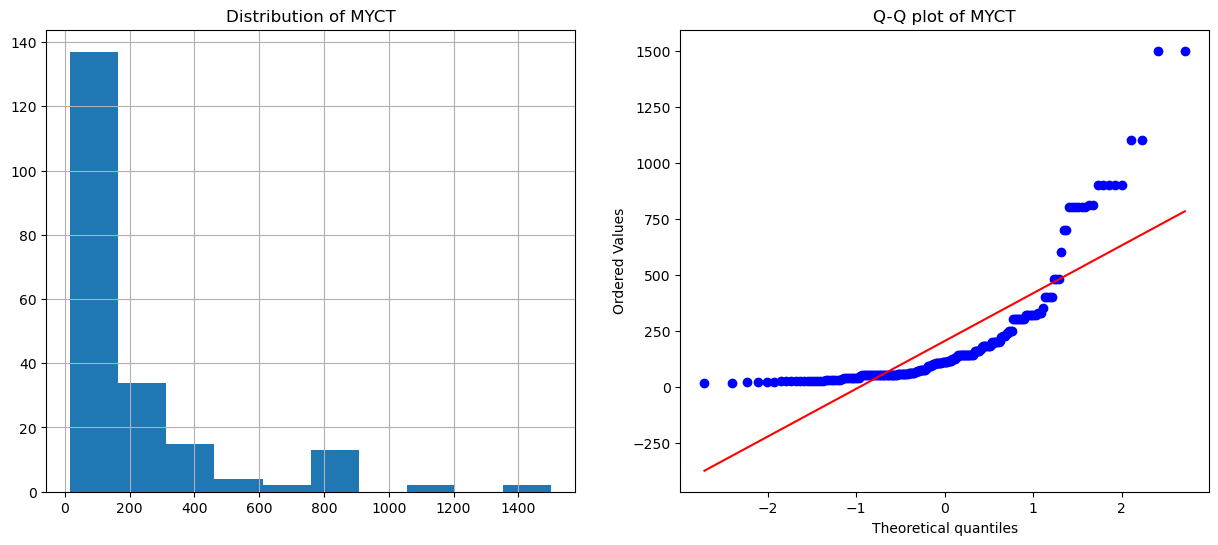

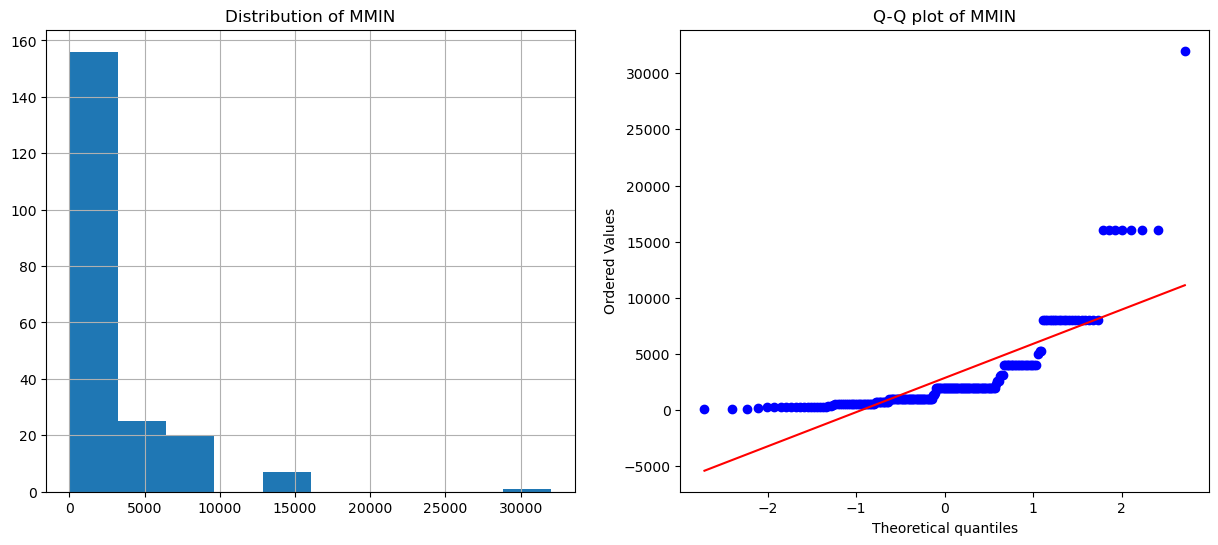

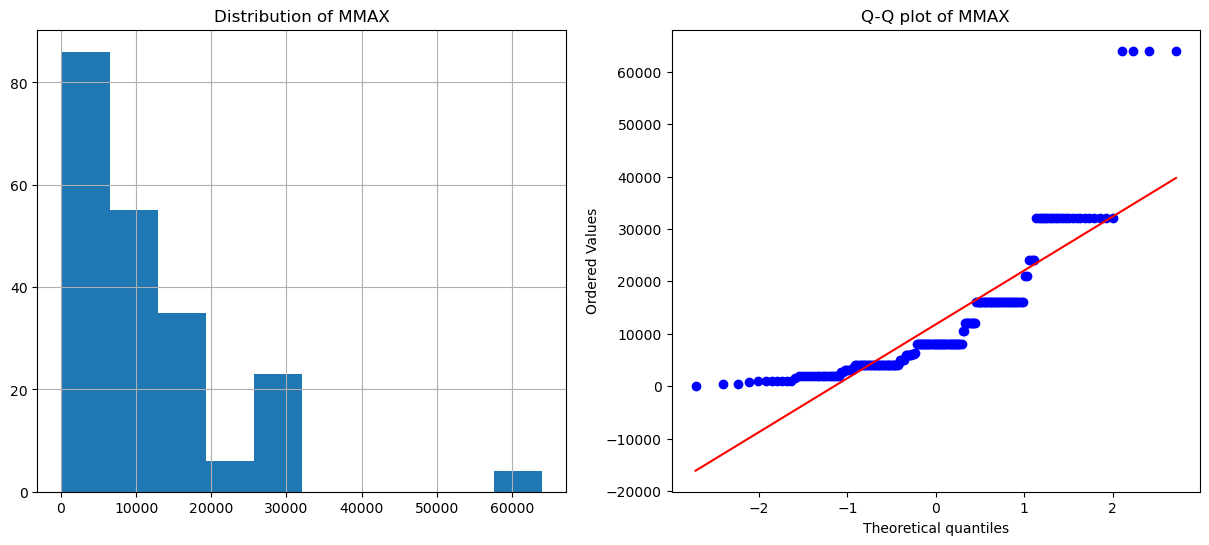

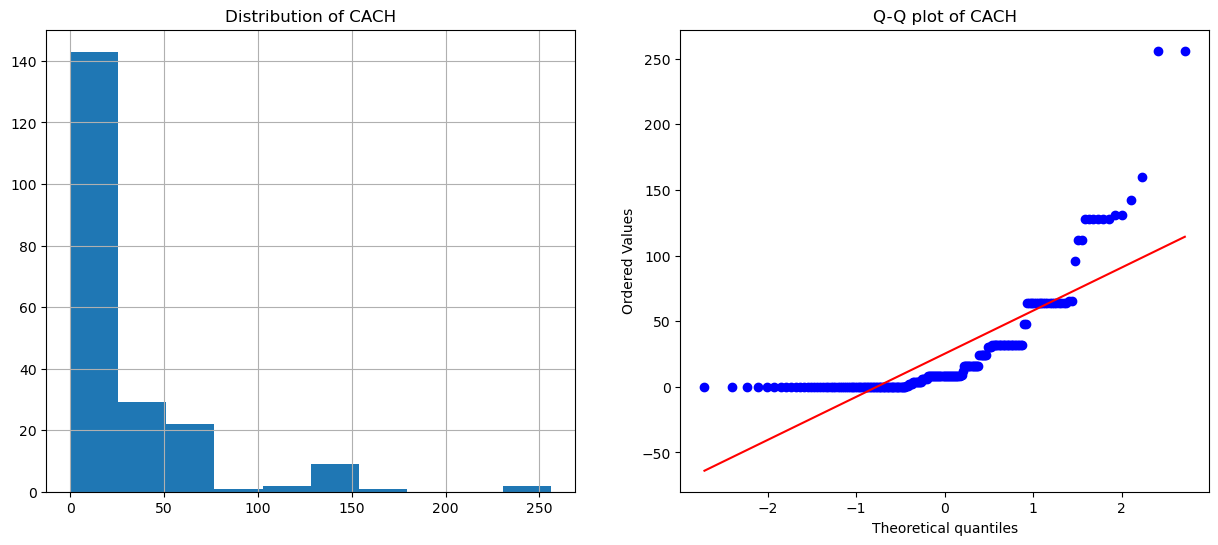

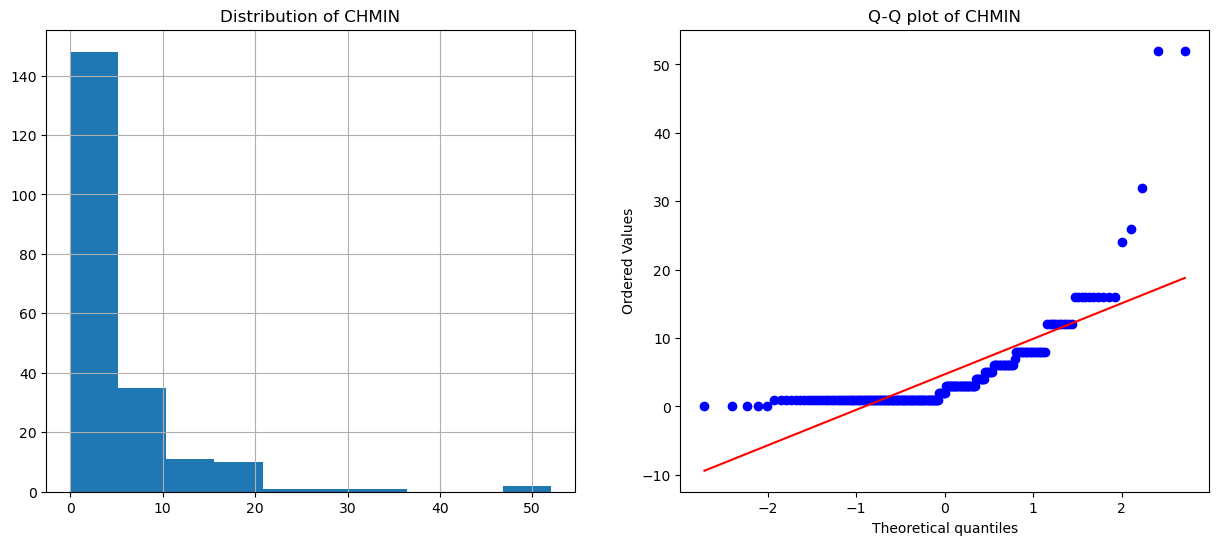

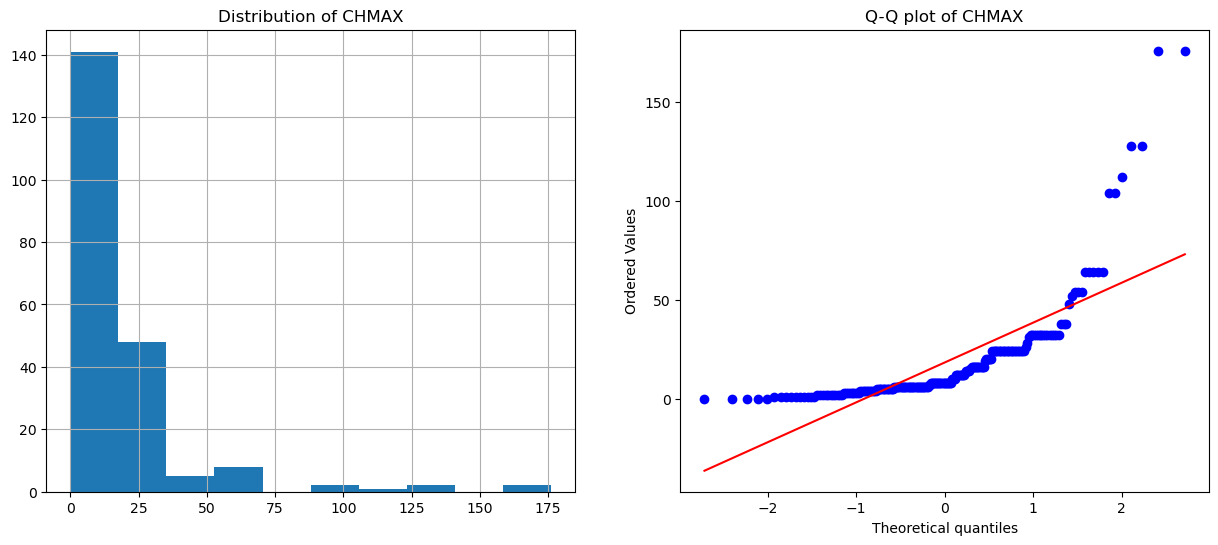

In [73]:
# plotting the Q-Q plot

import pylab 
import scipy.stats as stats


for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    
    plt.figure(figsize=(15,6))

    plt.subplot(1, 2, 1)
    df[var].hist()
    plt.title('Distribution of '+ var)

    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.title('Q-Q plot of '+ var)

    plt.show() 

##### INSIGHTS:
From the distribution plots, we can see that all the above variables are positively skewed. The Q-Q plot of all the variables confirm that the variables are not normally distributed.

## CONCLUSION


* The residual errors are randomly scattered around the zero line with no apparent pattern, suggesting that the homoscedasticity assumption is met. This indicates that the variance of errors is constant across levels of the predictor variable, and the Linear Regression model is a good fit.
* The R-squared value from 5-fold cross-validation is 0.4691, meaning that the model explains only 46.91% of the variance in the target variable. This indicates that the model does not explain a large portion of the variance and thus may not be a good fit for the data.
* The variables do not follow a normal distribution, as confirmed by the Q-Q plots. This could be a limitation for linear regression, which assumes normally distributed errors.
* So While the residuals indicate that the linear regression model is appropriate in terms of homoscedasticity, the model's predictive power (R-squared) is moderate, and the non-normality of the data may impact the model's performance. You may want to explore alternative models or transformations to improve the fit.